In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Telecom_churn_Case_Study

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

In [2]:
df = pd.read_csv('train (1).csv')


In [3]:
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [4]:
df.shape

(69999, 172)

data has 69999 rows and 172 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


<AxesSubplot:xlabel='churn_probability', ylabel='count'>

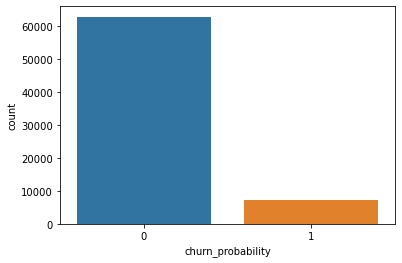

In [6]:
sns.countplot(df.churn_probability)

In [7]:
df.value_counts(df.churn_probability)

churn_probability
0    62867
1     7132
dtype: int64

In [8]:
print('% of churn in given dataset',round((df.value_counts(df.churn_probability)[1]*100/len(df)),2))

% of churn in given dataset 10.19


#### There are 7000 customers (approx 10%) who churned in given data set

In [9]:
df.drop_duplicates()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.00,0.00,0.00,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.00,0.00,0.00,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.00,0.00,0.00,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.00,0.00,0.00,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,69994,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,15.760,410.924,...,1,0,NaN,1.0,1.0,221,0.00,0.00,0.00,0
69995,69995,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,160.083,289.129,...,0,0,NaN,NaN,NaN,712,0.00,0.00,0.00,0
69996,69996,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,372.088,258.374,...,0,0,NaN,NaN,NaN,879,0.00,0.00,0.00,0
69997,69997,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,238.575,245.414,...,0,0,1.0,1.0,1.0,277,664.25,1402.96,990.97,0


#### there are no duplicate columns

In [10]:
df.circle_id.nunique()==1

True

#### Checking columns with only one unique values

In [11]:
redundant =[]
for i in df.columns:
    if (df[i].nunique()==1)== 1:
        redundant.append(i)
list(redundant)

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

#### Droppping columns with unique values = 1

In [12]:
df = df.drop(columns = 'id',axis = 1)

In [13]:
df = df.drop(columns = redundant,axis = 1)
df.shape

(69999, 158)

In [14]:
df_num = df.select_dtypes(['int64','float64'])
df_cat = df.select_dtypes("object")
print("there are ",df_num.shape[1]," numerical columns")
print("there are ",df_cat.shape[1]," categorical columns")

there are  152  numerical columns
there are  6  categorical columns


### Dealing with categorical variables

In [15]:
df_cat.head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014


In [16]:
### greater than 70% null columns in categorical variables
nulls_cat =[]
for i in df_cat.columns:
    a=df_cat[i].isnull().sum()
    if a >= len(df_cat)*0.70:
        nulls_cat.append(i)
list(nulls_cat)

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

#### although 70% are null values We should not drop column as whenever a person did not recharge data we can see null value, so we should not drop column or delete rows directly for this

In [17]:
### Converting date
df['date_of_last_rech_6'] = pd.to_datetime(df['date_of_last_rech_6']).dt.day
df['date_of_last_rech_7'] = pd.to_datetime(df['date_of_last_rech_7']).dt.day
df['date_of_last_rech_8'] = pd.to_datetime(df['date_of_last_rech_8']).dt.day

df['date_of_last_rech_data_6'] = pd.to_datetime(df['date_of_last_rech_data_6']).dt.day
df['date_of_last_rech_data_7'] = pd.to_datetime(df['date_of_last_rech_data_7']).dt.day
df['date_of_last_rech_data_8'] = pd.to_datetime(df['date_of_last_rech_data_8']).dt.day

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 158 entries, arpu_6 to churn_probability
dtypes: float64(132), int64(26)
memory usage: 84.4 MB


In [19]:
df.isnull().sum()

arpu_6                  0
arpu_7                  0
arpu_8                  0
onnet_mou_6          2768
onnet_mou_7          2687
                     ... 
aon                     0
aug_vbc_3g              0
jul_vbc_3g              0
jun_vbc_3g              0
churn_probability       0
Length: 158, dtype: int64

### Most columns are having null values and cannot be dropped directly , for example if person has not recahrged for so value is empty and it should be replaced with zero

<AxesSubplot:>

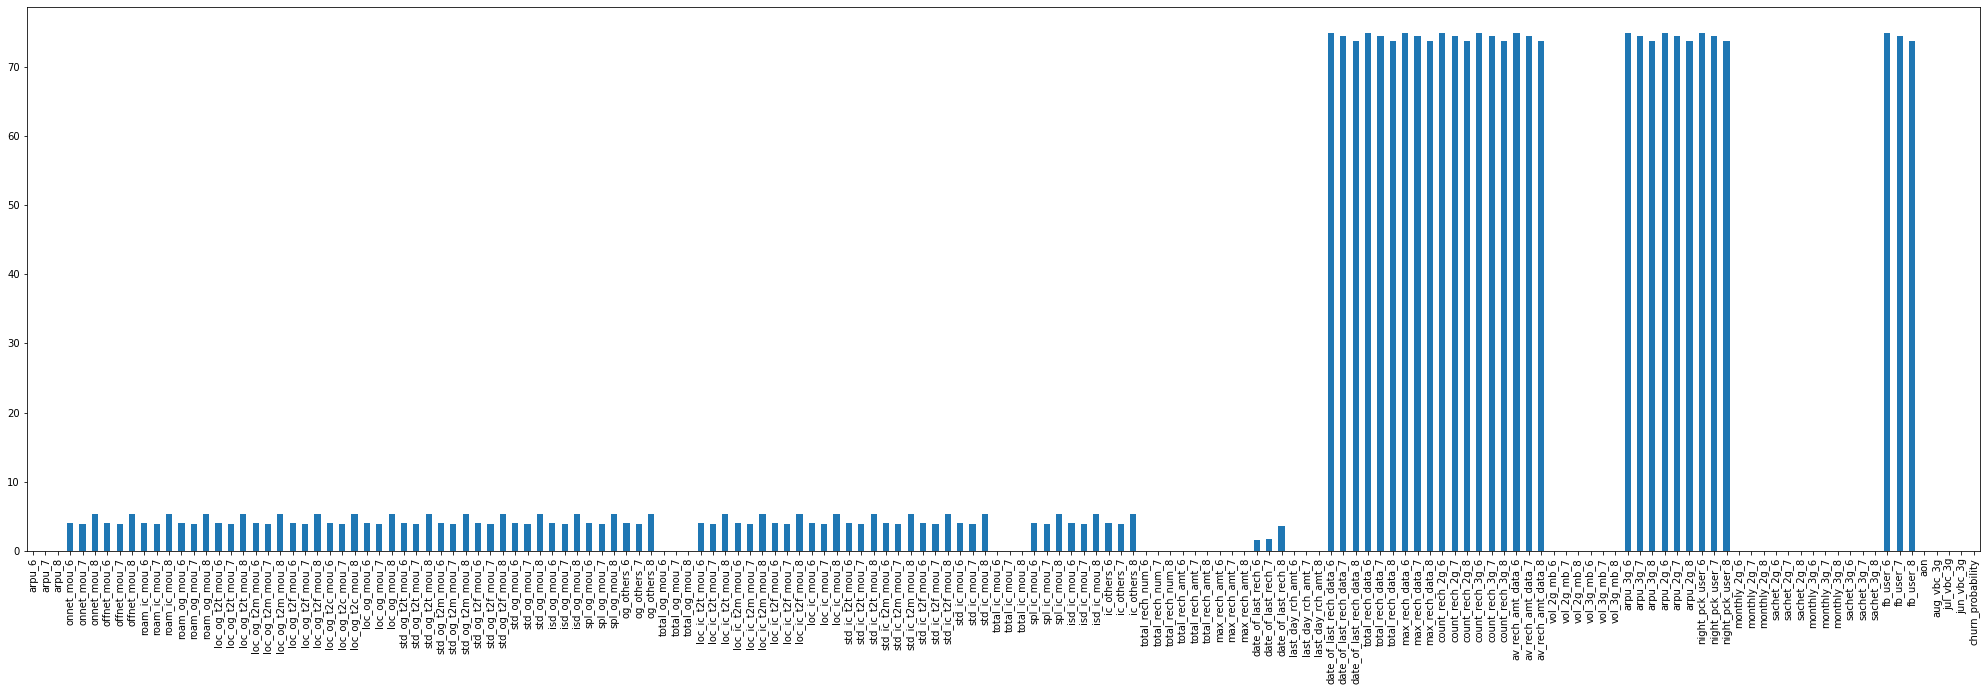

In [20]:
# Plotting the percentage of null values in each column
N = df.isnull().sum()*100/len(df.index)
plt.figure(figsize=[35,10])
N.plot.bar()

In [21]:
df = df.fillna(0)

In [22]:
df.shape

(69999, 158)

## Filtering High value customers
#### we need to predict churn for customers who have more valuable
#### high valueble customers are customers who's recharge amount is say is greater than certain threshold value for example top 70% percentile

In [23]:
#Total Recharge Amount for data

df['total_rech_amt_data_6'] = df['av_rech_amt_data_6'] * df['total_rech_data_6']
df['total_rech_amt_data_7'] = df['av_rech_amt_data_7'] * df['total_rech_data_7']
df['total_rech_amt_data_8'] = df['av_rech_amt_data_8'] * df['total_rech_data_8']

In [24]:
#Total Recharge Amount for data + call recharge
df["total_recharge_amnt_6"] = df['total_rech_amt_6'] + df['total_rech_amt_data_6']
df["total_recharge_amnt_7"] = df['total_rech_amt_7'] + df['total_rech_amt_data_7']
df["total_recharge_amnt_8"] = df['total_rech_amt_8'] + df['total_rech_amt_data_8']


In [25]:
df["total_recharge_amnt_6_7_AVE"] = (df["total_recharge_amnt_6"]+df["total_recharge_amnt_7"])/2

In [26]:
df = df[df["total_recharge_amnt_6_7_AVE"]>df["total_recharge_amnt_7"].quantile(0.7)]

In [27]:
df.shape

(20970, 165)

## EDA

<AxesSubplot:xlabel='churn_probability', ylabel='count'>

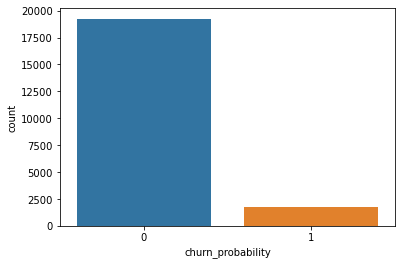

In [28]:
sns.countplot(df.churn_probability)

In [29]:
def box_plt(i):
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=i+"_6",x="churn_probability",hue="churn_probability",showfliers=False)
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=i+"_7",x="churn_probability",hue="churn_probability",showfliers=False)
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=i+"_8",x="churn_probability",hue="churn_probability",showfliers=False)
    plt.show()
    

In [30]:
def plots(i):
    df.groupby("churn_probability")[i+"_6",i+"_7",i+"_8"].median().plot.bar(figsize=(6,4))
    plt.title(i+" 6,7,8",fontsize=15)
    #plt.tick_params(size=5,labelsize = 15) 
    plt.ylabel(i,fontsize=10)
    plt.xlabel("Churn probability",fontsize=10)
    plt.show()


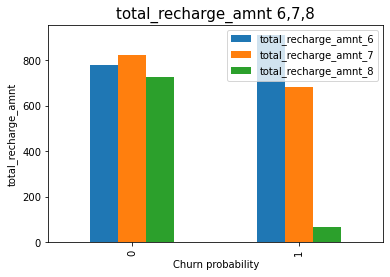

In [31]:
## plotting median of recharge amnount
plots('total_recharge_amnt')


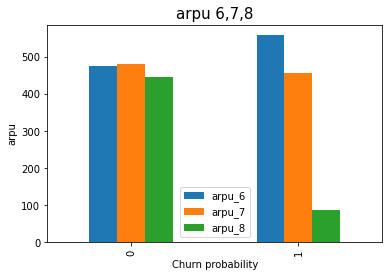

In [32]:
## plotting median of average revenue per user
plots('arpu')


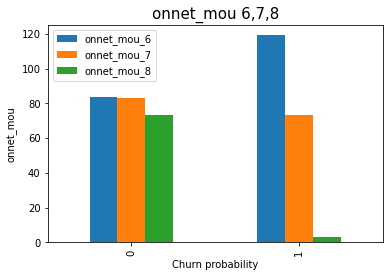

In [33]:
## plotting median of calls within the same operator network
plots('onnet_mou')


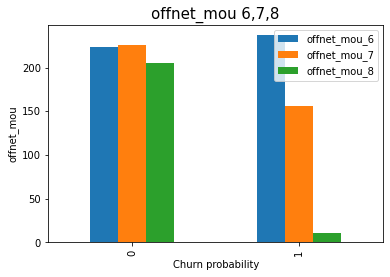

In [34]:
## plotting median of calls within the same operator network
plots('offnet_mou')

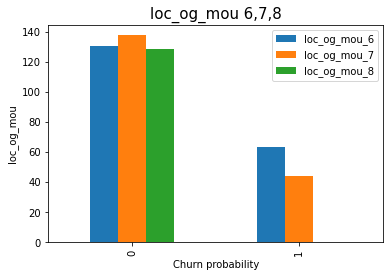

In [35]:
plots('loc_og_mou')


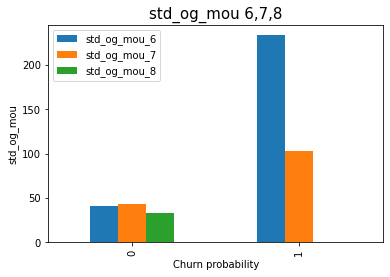

In [36]:
plots('std_og_mou')


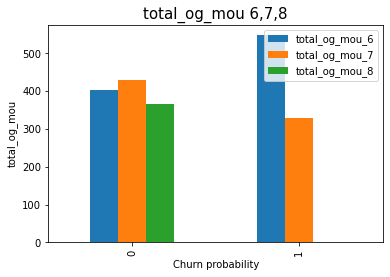

In [37]:
plots('total_og_mou')



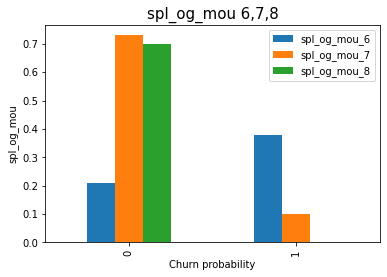

In [38]:
plots('spl_og_mou')

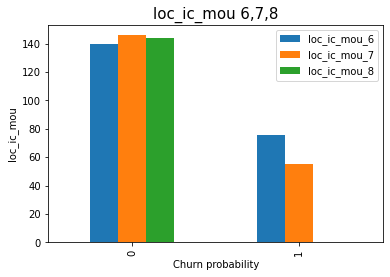

In [39]:
plots('loc_ic_mou')

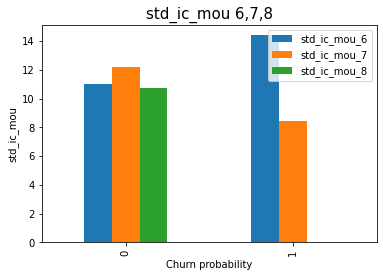

In [40]:
plots('std_ic_mou')

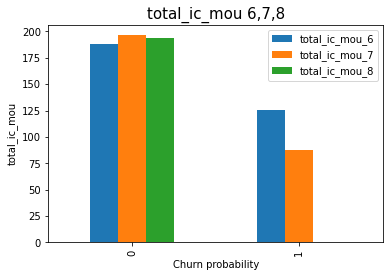

In [41]:
plots('total_ic_mou')

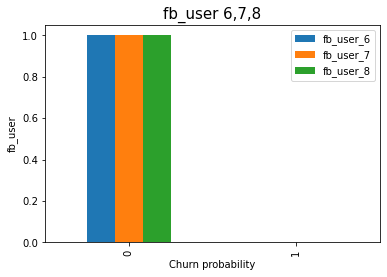

In [42]:
plots('fb_user')

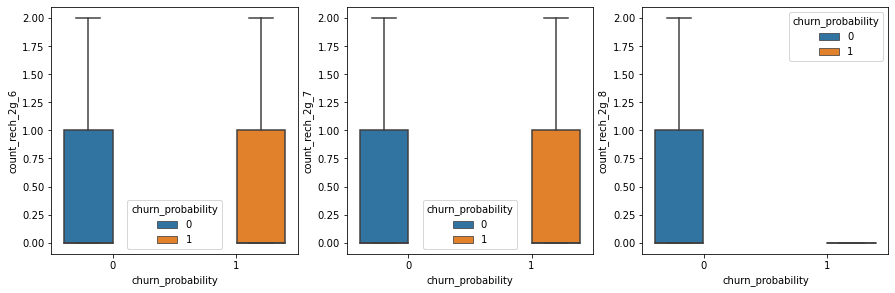

In [43]:
box_plt('count_rech_2g')

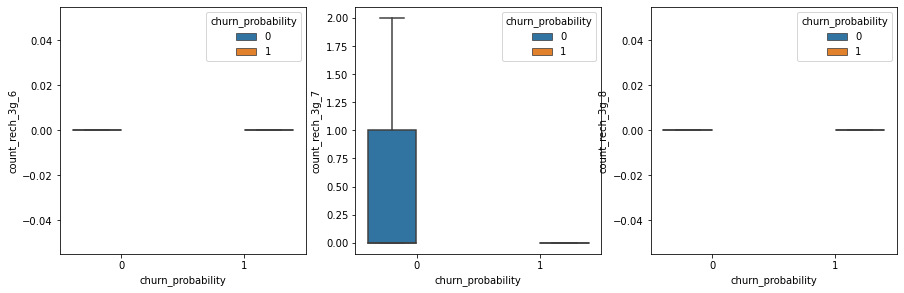

In [44]:
box_plt('count_rech_3g')

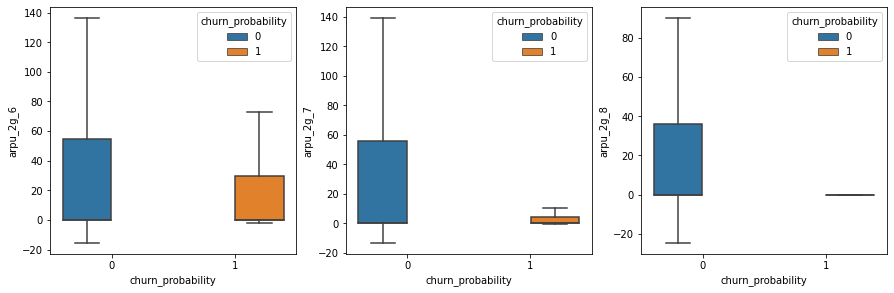

In [45]:
box_plt('arpu_2g')

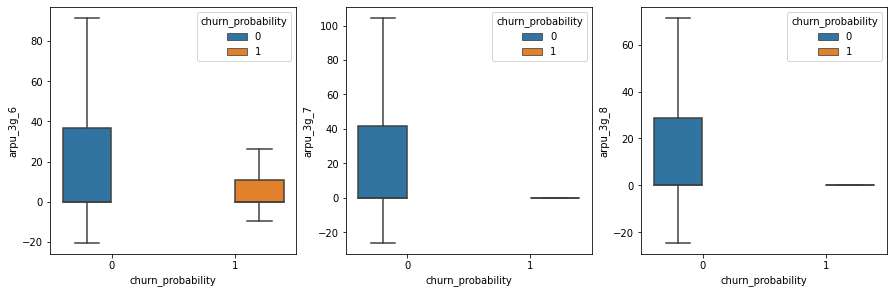

In [46]:
box_plt('arpu_3g')

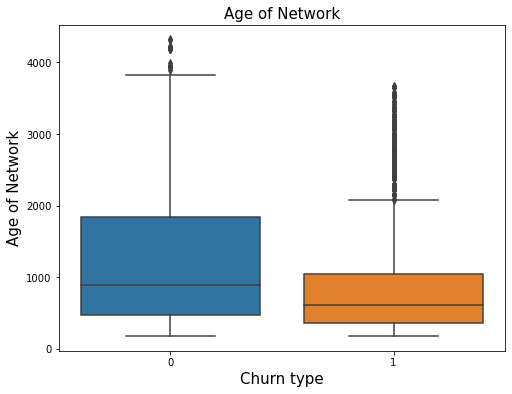

In [47]:
plt.figure(figsize=[8,6])
sns.boxplot(data=df,x="churn_probability",y="aon")
plt.title("Age of Network",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.ylabel("Age of Network",fontsize=15)
plt.show()

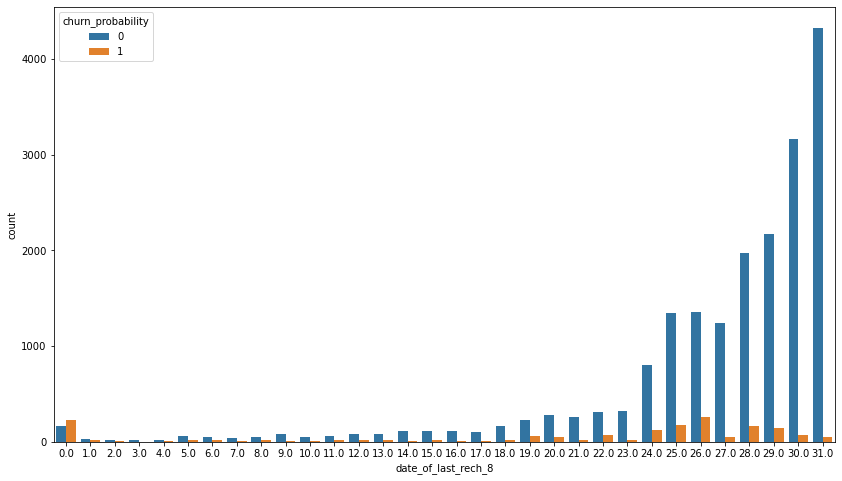

In [48]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'date_of_last_rech_8', hue = 'churn_probability',data = df)
plt.show()

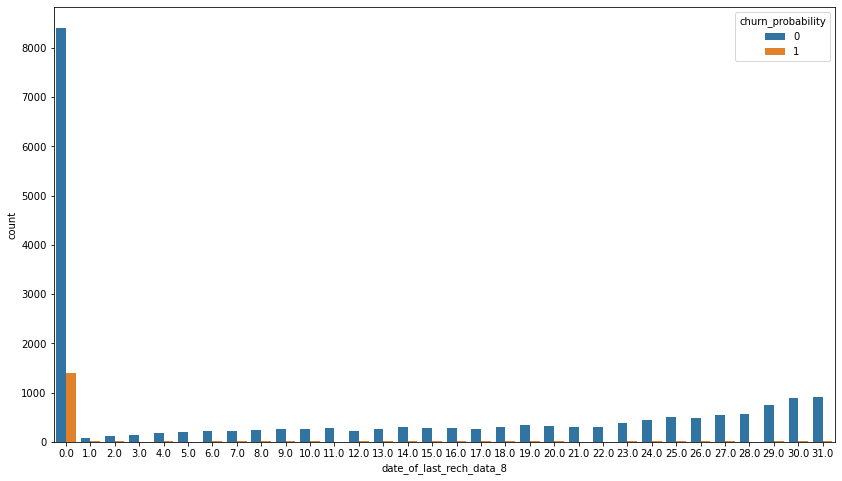

In [49]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'date_of_last_rech_data_8', hue = 'churn_probability',data = df)
plt.show()

<AxesSubplot:>

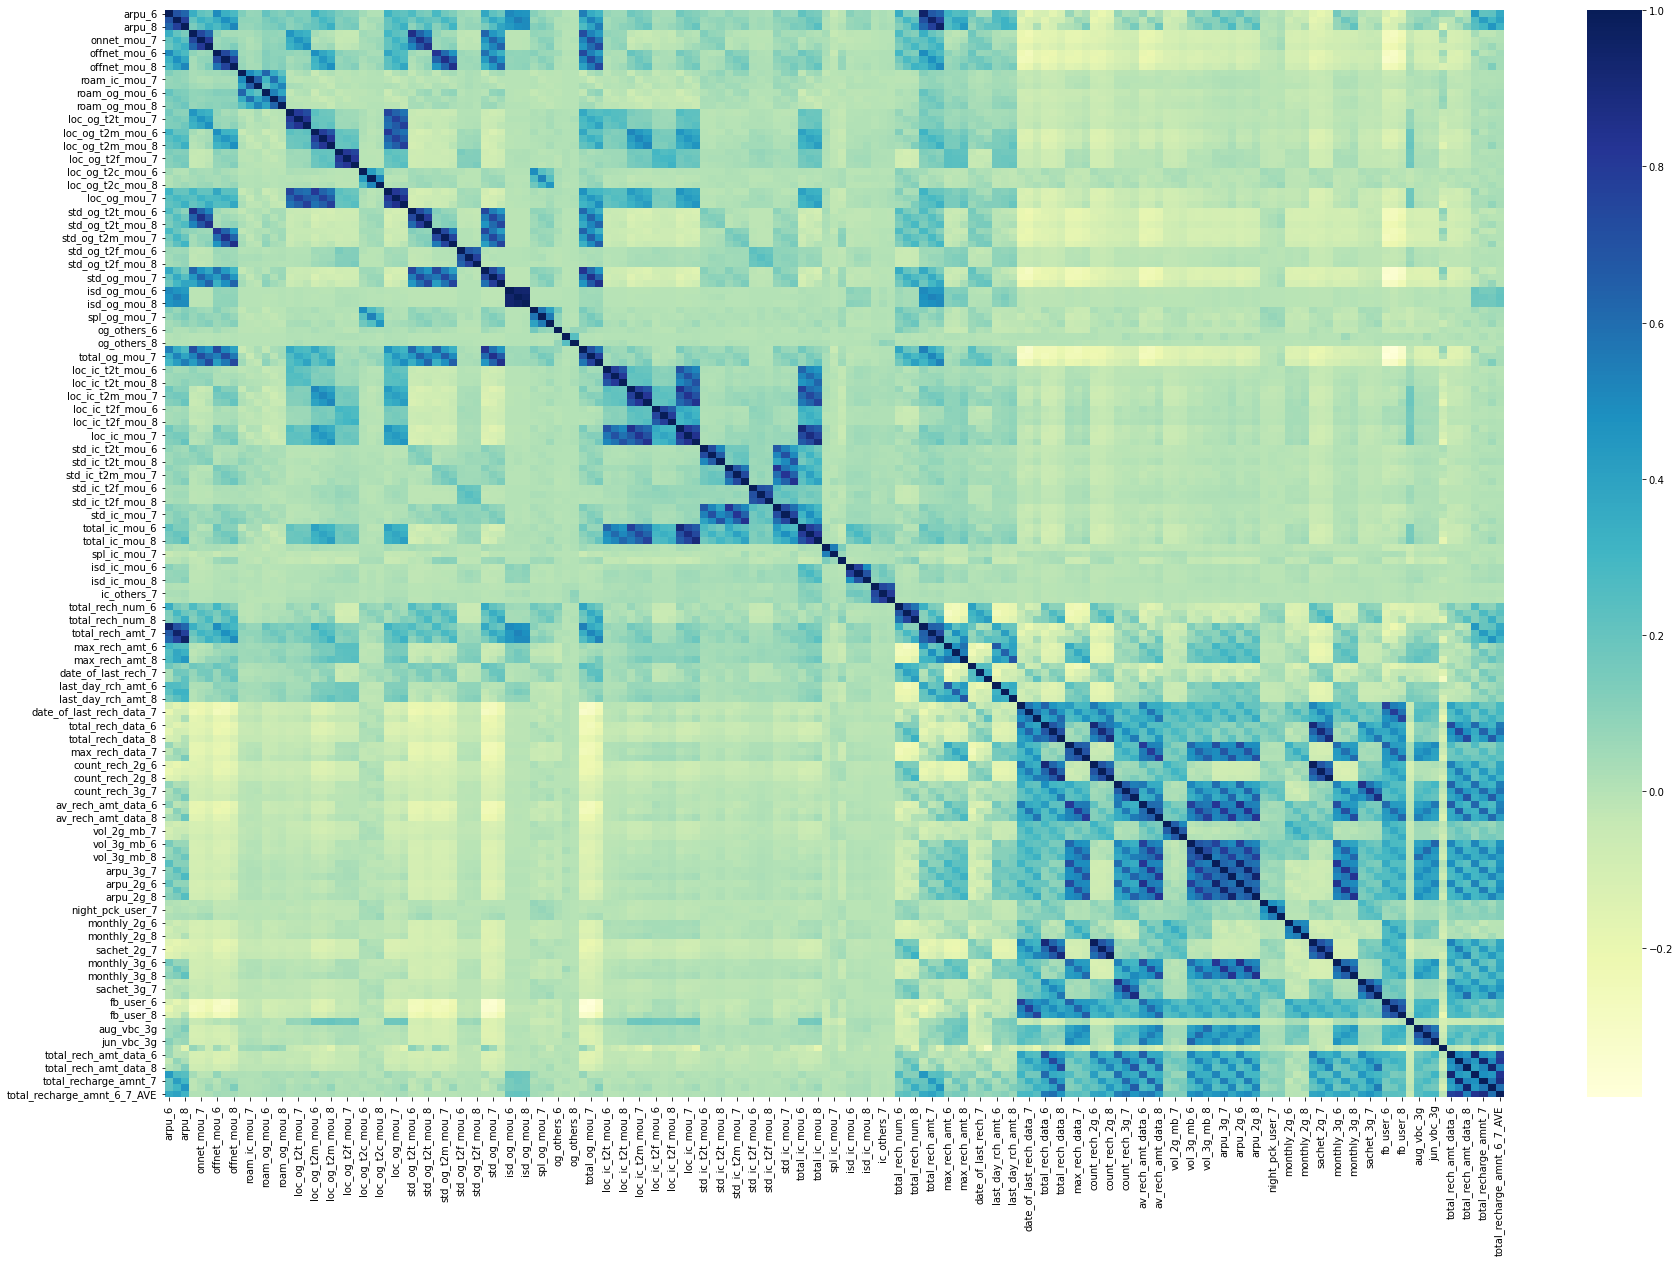

In [50]:
# heat map to check correlation of variables
plt.figure(figsize=[30,20])
sns.heatmap(df.corr(),cmap='YlGnBu')

### Observations from EDA
#### 1)for persons who are likely to churn we can see that i.e from june to august
##### recharge amount is decreasing with time 
##### Average amount per user decreases with time
##### local, STD, spl incoming calls decreases with time
##### local, STD, spl outgoing calls decreases with time
##### 2g and 3g recharge decreases with time
##### those who churn are not FB users generally
##### those who do not churn recharge count of increased during last 10 days
##### those who churn have lesser age of network i.e not old users

### there are columns with high correlration(heat map) and we should use PCA / feature ellimination


# Modelling

### Scaling data using standard scaler for PCA

In [51]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y = df.pop('churn_probability')
X = df.copy()
X = scaler.fit_transform(X)

In [52]:
y.value_counts()

0    19239
1     1731
Name: churn_probability, dtype: int64

## Principal Component Analysis

In [53]:
from sklearn.decomposition import PCA
pca = PCA(random_state = 42)

In [54]:
pca.fit(X)

PCA(random_state=42)

#### PCA Components

In [55]:

pca.components_

array([[-2.73528811e-02, -2.36464296e-02, -1.39688667e-02, ...,
         1.20448881e-01,  1.07426272e-01,  1.34901884e-01],
       [ 1.65978930e-01,  1.79532497e-01,  1.79446389e-01, ...,
         8.13146986e-02,  8.72986069e-02,  9.35213271e-02],
       [ 8.19226886e-02,  1.04435816e-01,  9.34479377e-02, ...,
         1.29895875e-01,  1.23184253e-01,  1.39671926e-01],
       ...,
       [ 0.00000000e+00,  1.07018089e-16, -4.39072179e-16, ...,
         3.06286592e-02, -9.93123441e-02, -1.34559855e-01],
       [ 0.00000000e+00, -7.45220046e-17,  3.85620786e-17, ...,
         6.05712567e-02, -4.96095040e-03, -2.51466669e-02],
       [-0.00000000e+00, -3.24751173e-16,  3.35623925e-16, ...,
        -1.00393626e-01, -4.73297326e-02, -5.89550369e-02]])

#### variance ratio of variables

In [56]:

pca.explained_variance_ratio_

array([1.21067896e-01, 8.91231882e-02, 6.50813274e-02, 5.65362967e-02,
       3.56677309e-02, 3.16762514e-02, 2.69729840e-02, 2.53915294e-02,
       2.27577199e-02, 2.20596146e-02, 2.04621293e-02, 1.90556106e-02,
       1.78339014e-02, 1.68170777e-02, 1.65342889e-02, 1.58973512e-02,
       1.55866592e-02, 1.46571386e-02, 1.41157742e-02, 1.34424019e-02,
       1.22122619e-02, 1.12102692e-02, 1.07228360e-02, 1.03414827e-02,
       1.00419308e-02, 9.65141078e-03, 9.49214769e-03, 9.16433701e-03,
       8.20997013e-03, 7.65688077e-03, 7.62493494e-03, 7.16082989e-03,
       7.01552322e-03, 6.83217497e-03, 6.50526958e-03, 6.32100770e-03,
       6.19761732e-03, 5.88027744e-03, 5.80426357e-03, 5.74356085e-03,
       5.64860887e-03, 5.36366578e-03, 5.26122982e-03, 5.13576799e-03,
       5.08110453e-03, 4.97573338e-03, 4.76317208e-03, 4.52346737e-03,
       4.38921366e-03, 4.28821708e-03, 4.25042319e-03, 4.00837058e-03,
       3.99852889e-03, 3.90661578e-03, 3.77435439e-03, 3.73042705e-03,
      

### Scree plot


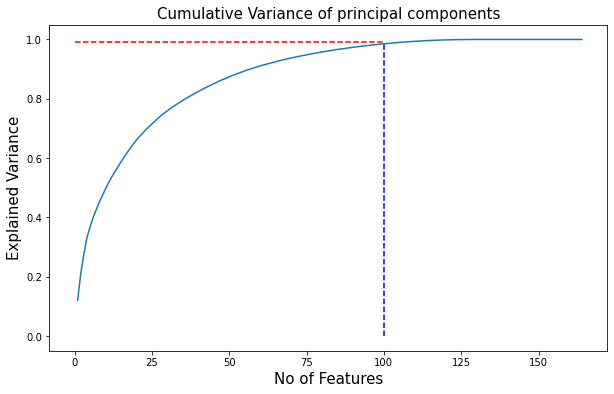

In [57]:
cum_var = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=[10,6])
sns.lineplot(x=list(range(1,165)),y=cum_var)
plt.title("Cumulative Variance of principal components",size=15)
plt.ylabel("Explained Variance",size=15)
plt.xlabel("No of Features",size=15)
plt.vlines(x=100, ymax=0.99, ymin=0.0, colors="b", linestyles="--")
plt.hlines(y=0.99, xmax=100, xmin=0.0, colors="r", linestyles="--")

### selecting 100 componenets for almost explaning 99 % variance
### using incremental PCA

In [58]:
from sklearn.decomposition import IncrementalPCA
iPCA = IncrementalPCA(n_components=100)
X1 = iPCA.fit_transform(X)

## Logistic Regression

In [59]:
import statsmodels.api as sm
X_lr = sm.add_constant(X1)
LR1 = sm.GLM(y,X_lr,family=sm.families.Binomial())
LR1 = LR1.fit()
LR1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                20970
Model:                            GLM   Df Residuals:                    20869
Model Family:                Binomial   Df Model:                          100
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3704.5
Date:                Wed, 11 May 2022   Deviance:                       7409.0
Time:                        07:15:32   Pearson chi2:                 6.84e+05
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.3588      0.087    -50.278      0.000      -4.529      -4.189
x1            -0.0665      0.013     -4.944      0.000      -0.093      -0.040
x2            -0.3954      0.020    -19.563      0.000      -0.435      -0.356
x3             0.2271      0.024      9.661      0.000       0.181       0.273
x4            -0.4272      0.025    -17.053      0.000      -0.476      -0.378
x5            -0.1138      0.031     -3.694      0.000      -0.174      -0.053
x6             0.0859      0.024      3.534      0.000       0.038       0.134
x7            -0.2375      0.027     -8.790      0.000      -0.291      -0.185
x8            -0.4365      0.025    -17.366      0.000      -0.486      -0.387
x9             0.0371      0.038      0.987      0.324      -0.037       0.111
x10            0.3153      0.034      9.309      0.000       0.249       0.382
x11            0.1072      0.036      2.991      0.003       0.037       0.177
x12           -0.0217      0.041     -0.534      0.593      -0.101       0.058
x13           -0.0792      0.029     -2.703      0.007      -0.137      -0.022
x14           -0.0572      0.087     -0.660      0.509      -0.227       0.113
x15           -0.0971      0.038     -2.568      0.010      -0.171      -0.023
x16            0.1749      0.041      4.284      0.000       0.095       0.255
x17           -0.1357      0.065     -2.097      0.036      -0.262      -0.009
x18            0.0214      0.054      0.398      0.691      -0.084       0.127
x19            0.4169      0.027     15.604      0.000       0.365       0.469
x20            0.0052      0.053      0.099      0.921      -0.099       0.109
x21            0.1829      0.110      1.663      0.096      -0.033       0.398
x22           -0.1535      0.072     -2.131      0.033      -0.295      -0.012
x23            0.1045      0.041      2.523      0.012       0.023       0.186
x24           -0.0202      0.057     -0.356      0.722      -0.132       0.091
x25           -0.0019      0.064     -0.031      0.976      -0.127       0.123
x26           -0.0988      0.055     -1.801      0.072      -0.206       0.009
x27           -0.0836      0.051     -1.623      0.105      -0.184       0.017
x28            0.0084      0.058      0.144      0.886      -0.106       0.122
x29           -0.1570      0.218     -0.721      0.471      -0.584       0.270
x30           -0.2518      0.064     -3.909      0.000      -0.378      -0.126
x31           -1.1028      0.999     -1.104      0.270      -3.061       0.856
x32           -0.0832      0.065     -1.275      0.202      -0.211       0.045
x33           -0.2595      0.261     -0.993      0.321      -0.772       0.253
x34           -0.0427      0.133     -0.321      0.748      -0.304       0.218
x35           -0.7987      0.100     -8.009      0.000      -0.994      -0.603
x3

#### predicting cut off for different cutoffs ranging from 0.1 to 1



In [60]:
y_pred = LR1.predict(X_lr)

In [61]:
# Predicting Churn Probability for different cut-offs
lst = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
cutoff = pd.DataFrame()
cutoff['Churn'] = y
cutoff['Prob'] = y_pred
for i in lst:
    cutoff[i] = cutoff['Prob'].apply(lambda x: 0 if x<i else 1)
cutoff.head()

,Churn,Prob,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
4,0,0.060990,0,0,0,0,0,0,0,0,0
15,0,0.000462,0,0,0,0,0,0,0,0,0
23,0,0.132517,1,0,0,0,0,0,0,0,0
24,0,0.053955,0,0,0,0,0,0,0,0,0
27,0,0.005100,0,0,0,0,0,0,0,0,0


### scoring metrics with cutt off

In [62]:

from sklearn.metrics import confusion_matrix,accuracy_score
sens = pd.DataFrame()
sens['Cut-off'] = lst
sens['accuracy'] = [accuracy_score(cutoff['Churn'],cutoff[i]) for i in lst]
confusion = [confusion_matrix(cutoff['Churn'],cutoff[i]) for i in lst]
sensitivity = [confusion[i][1,1]/(confusion[i][1,1]+confusion[i][1,0]) for i in range(9)]
sens['sensitivity'] = sensitivity
specificity = [confusion[i][0,0]/(confusion[i][0,0]+confusion[i][0,1]) for i in range(9)]
sens['specificity'] = specificity
sens

,Cut-off,accuracy,sensitivity,specificity
0,0.1,0.848546,0.826112,0.850564
1,0.2,0.909728,0.718082,0.926971
2,0.3,0.926276,0.602542,0.955403
3,0.4,0.930854,0.453495,0.973803
4,0.5,0.930520,0.321779,0.985290
5,0.6,0.929804,0.235702,0.992255
6,0.7,0.927039,0.150780,0.996881
7,0.8,0.922127,0.065280,0.999220
8,0.9,0.919027,0.020797,0.999844


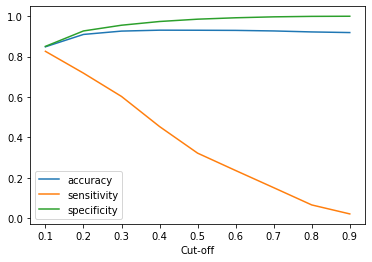

In [63]:

sens.plot.line(x='Cut-off', y=['accuracy','sensitivity','specificity'])
plt.show()

In [64]:

result = pd.DataFrame({'Churn':y,'Prob':y_pred})
result['Predicted'] = result['Prob'].apply(lambda x: 0 if x<0.4 else 1)
result.head()

,Churn,Prob,Predicted
4,0,0.060990,0
15,0,0.000462,0
23,0,0.132517,0
24,0,0.053955,0
27,0,0.005100,0


### Accuracy and F1-score for logistic regression

In [65]:

result = result.drop('Prob',axis=1)
from sklearn.metrics import classification_report
print(classification_report(result['Churn'],result['Predicted']))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     19239
           1       0.61      0.45      0.52      1731

    accuracy                           0.93     20970
   macro avg       0.78      0.71      0.74     20970
weighted avg       0.92      0.93      0.93     20970



### confusion matrix - Logistic regression

In [66]:

from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(result['Churn'],result['Predicted']))

[[18735   504]
 [  946   785]]


# Random Forest Classifier

In [67]:

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=100)
RF.fit(X1,y)

RandomForestClassifier(random_state=100)

In [68]:
y_pred = RF.predict(X1)

## Hyper parameters tuning using grid search CV

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
n_fold = 4
params = {'n_estimators' :[30,60,100],'max_depth':[10,20,30],'min_samples_leaf':[3,5,10],'min_samples_split': [5, 10, 20]}

In [71]:
RF2 = GridSearchCV(estimator = RF,cv = n_fold,param_grid = params,n_jobs = -1,scoring = 'accuracy',verbose = 1)
RF2.fit(X1,y)

Fitting 4 folds for each of 81 candidates, totalling 324 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [3, 5, 10],
                         'min_samples_split': [5, 10, 20],
                         'n_estimators': [30, 60, 100]},
             scoring='accuracy', verbose=1)

### best parameters from Grid Search

In [72]:
RF2.best_params_

{'max_depth': 30,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

In [73]:
RF3 = RF2.best_estimator_

### ROC Curve for RF model

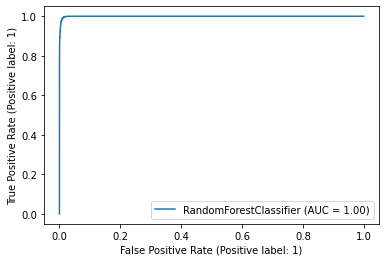

In [74]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(RF3,X1,y,drop_intermediate=False)

#### Precesion and recall for RF

In [75]:
print(classification_report(y,RF3.predict(X1)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     19239
           1       1.00      0.63      0.77      1731

    accuracy                           0.97     20970
   macro avg       0.98      0.81      0.88     20970
weighted avg       0.97      0.97      0.97     20970



In [76]:
# Confusion matrix
print(confusion_matrix(y,RF3.predict(X1)))

[[19239     0]
 [  647  1084]]


## transforming test data

In [77]:
test = pd.read_csv('test (1).csv')
test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [78]:
ID = test['id']

In [79]:
test = test.drop(columns = redundant,axis = 1)

In [80]:
test = test.drop(columns = 'id',axis = 1)

In [81]:
test['date_of_last_rech_6'] = pd.to_datetime(test['date_of_last_rech_6']).dt.day
test['date_of_last_rech_7'] = pd.to_datetime(test['date_of_last_rech_7']).dt.day
test['date_of_last_rech_8'] = pd.to_datetime(test['date_of_last_rech_8']).dt.day

test['date_of_last_rech_data_6'] = pd.to_datetime(test['date_of_last_rech_data_6']).dt.day
test['date_of_last_rech_data_7'] = pd.to_datetime(test['date_of_last_rech_data_7']).dt.day
test['date_of_last_rech_data_8'] = pd.to_datetime(test['date_of_last_rech_data_8']).dt.day

In [82]:
test = test.fillna(0)

In [83]:
#Total Recharge Amount for data

test['total_rech_amt_data_6'] = test['av_rech_amt_data_6'] * test['total_rech_data_6']
test['total_rech_amt_data_7'] = test['av_rech_amt_data_7'] * test['total_rech_data_7']
test['total_rech_amt_data_8'] = test['av_rech_amt_data_8'] * test['total_rech_data_8']
#Total Recharge Amount for data + call recharge
test["total_recharge_amnt_6"] = test['total_rech_amt_6'] + test['total_rech_amt_data_6']
test["total_recharge_amnt_7"] = test['total_rech_amt_7'] + test['total_rech_amt_data_7']
test["total_recharge_amnt_8"] = test['total_rech_amt_8'] + test['total_rech_amt_data_8']
test["total_recharge_amnt_6_7_AVE"] = (test["total_recharge_amnt_6"]+test["total_recharge_amnt_7"])/2

In [84]:
test = scaler.transform(test)
X_test = iPCA.transform(test)

### using Logistic Regression for test data prediction

In [85]:
# Prediction for test data using Logistic Regression

X_test_lr = sm.add_constant(X_test)
y_test_lr = LR1.predict(X_test_lr)
test_LR = pd.DataFrame({'id':ID,'Prob':y_test_lr})
test_LR.head()

,id,Prob
0,69999,0.012801
1,70000,0.058932
2,70001,0.267790
3,70002,0.014061
4,70003,0.052565


In [86]:
# Churn Probability dataframe
test_LR['churn_probability']=test_LR['Prob'].apply(lambda x: 0 if x<0.5 else 1)

test_LR.head()

,id,Prob,churn_probability
0,69999,0.012801,0
1,70000,0.058932,0
2,70001,0.267790,0
3,70002,0.014061,0
4,70003,0.052565,0


In [87]:
test_LR['churn_probability'].value_counts()

0    28725
1     1275
Name: churn_probability, dtype: int64

In [88]:
test_LR = test_LR.drop('Prob',axis=1)

In [89]:
# Exporting to a csv file
test_LR.to_csv('Submission.csv',index=False)

### using Random Forest for test data prediction

In [90]:
# predicting using random forest model
y_test_RF = RF3.predict(X_test)
TEST_RF = pd.DataFrame({'id':ID,'churn_probability':y_test_RF})
TEST_RF.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [91]:
###exporting RF output in csv format
TEST_RF.to_csv('RF.csv',index=False)

In [92]:
### Logistic regression provided better accuracy on test data